# Install require libraries

In [75]:
from scipy.io import arff
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from mpl_toolkits.mplot3d import *
from random import random, seed
from matplotlib import cm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
import collections
import pandas as pd
import numpy as np

## The clustering result for each company+account_name (Include the COVID-19 effect)

In [76]:
df = pd.read_csv('new_data1.csv')

In [77]:
df.head()

user_name  daily_profit  \
0         00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales     82.057523   
1  009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales     18.768728   
2    009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales     19.840337   
3  009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income     55.199238   
4  009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...      3.429364   

   daily_income      expenses      coeff   p_value  
0    6220.60697   6138.549447  -0.731327  0.851442  
1   16376.42800  16357.659272 -19.845017  0.047304  
2   17489.60720  17469.766863 -24.935850  0.084332  
3    4383.18000   4327.980762   3.283642  0.338881  
4    3198.61200   3195.182636  -3.546503  0.172920

In [78]:
df.shape

(3148, 6)

### correlation check

In [79]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

The expenses is highly correlated with the daily income, we can drop one of those.

In [80]:
df = df.drop(["expenses"], axis=1)

In [81]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [82]:
df = df.drop(["user_name", "p_value"], axis =1)
df.head()

daily_profit  daily_income      coeff
0     82.057523    6220.60697  -0.731327
1     18.768728   16376.42800 -19.845017
2     19.840337   17489.60720 -24.935850
3     55.199238    4383.18000   3.283642
4      3.429364    3198.61200  -3.546503

### Normalization

In [83]:
sd = StandardScaler()
sd1 = RobustScaler()
df = sd.fit_transform(df)
df = sd1.fit_transform(df)

In [84]:
df = pd.DataFrame(df)
df.head()

0         1         2
0  1.390056  0.211266  0.073567
1  0.273835  0.898241 -0.680796
2  0.292734  0.973540 -0.881717
3  0.916358  0.086976  0.232026
4  0.003295  0.006848 -0.037540

In [85]:
df.columns = ['new_profit','new_income', 'coeff']
df.shape

(3148, 3)

We can rename them. Since there are only three variables, we can draw a 3-D plot to show them.

### Drop the outliers

In [86]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

### Draw a 3-D plot tow show them

<IPython.core.display.Javascript object>


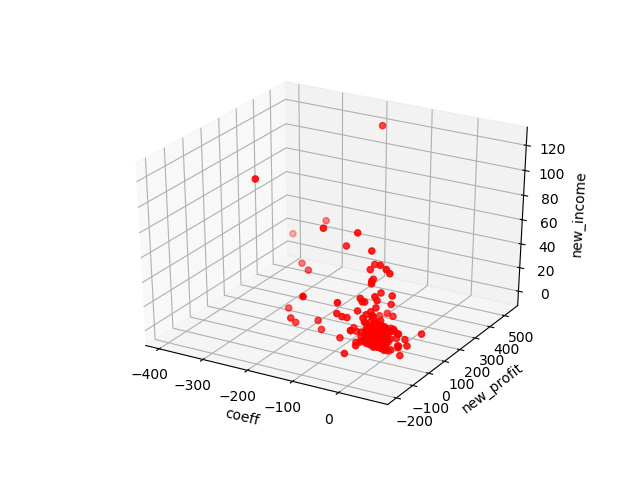

In [87]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

### Runing the k-mean cluster

<IPython.core.display.Javascript object>


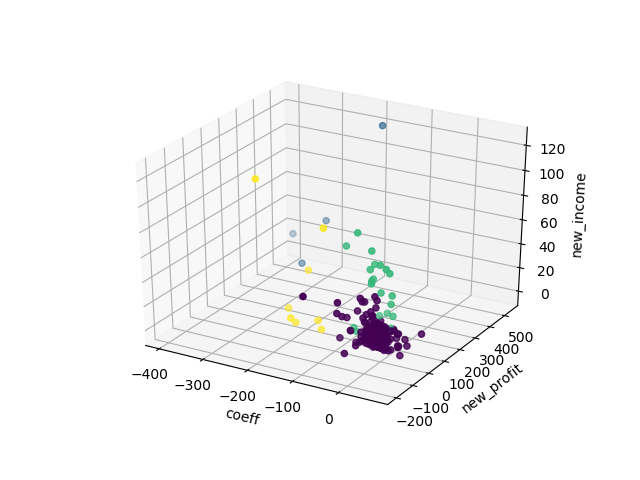

In [88]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(df)
labels = kmeans_model.predict(df)
k_means = labels
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df["coeff"]
y = df["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

### Check the result accuracy.

In [89]:
X = df.values
print(metrics.silhouette_score(X, labels, metric='euclidean'))
print(davies_bouldin_score(X, labels))

0.9312552826379671
0.6815657835503977


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


### Showing their common features.

In [90]:
df1 = pd.read_csv('new_data1.csv')
result = pd.concat([df1, pd.DataFrame(k_means)], axis=1, sort=False)
result.columns = ['company_id', 'daily_profit', "daily_income", "daily_outcome", "coeff", "p_value", "K_means"]

In [91]:
counter=collections.Counter(k_means)
print(counter)

Counter({0: 3111, 2: 23, 3: 8, 1: 4})


In [92]:
result.loc[(result['K_means'] == 0)].mean()

daily_profit       121.599188
daily_income     23491.338125
daily_outcome    23369.738937
coeff              -79.448165
p_value              0.260944
K_means              0.000000
dtype: float64

In [93]:
result.loc[(result['K_means'] == 2)].mean()

daily_profit       1054.321897
daily_income     119101.210989
daily_outcome    118046.889092
coeff              -257.640668
p_value               0.266911
K_means               2.000000
dtype: float64

In [94]:
result.loc[(result['K_means'] == 3)].mean()

daily_profit       218.072632
daily_income     21868.123312
daily_outcome    21650.050680
coeff             -741.003418
p_value              0.312238
K_means              3.000000
dtype: float64

In [95]:
result.loc[(result['K_means'] == 1)].mean()

daily_profit       394.285016
daily_income     39862.004248
daily_outcome    39467.719232
coeff               33.678782
p_value              0.003826
K_means              1.000000
dtype: float64

The clustering result seemed like contradictory. The higher daily profit the higher daily revenue, but lower coefficient.

## The clustering result for each company+account_name before 2020 (Not included the COVID-19 effect)

In [96]:
df = pd.read_csv('new_data2.csv')
df.head()

user_name  daily_profit  \
0         00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales     82.057523   
1  009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales      9.651116   
2    009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales      7.909785   
3  009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income     52.159368   
4  009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...      0.963863   

   daily_income      expenses      coeff   p_value  
0   6220.606970   6138.549447  -0.731327  0.851442  
1  16712.679583  16703.028467 -20.082338  0.069878  
2  17785.715417  17777.805631 -26.526618  0.098223  
3   4478.290000   4426.130632   4.053917  0.270635  
4   3245.362083   3244.398221  -3.725343  0.197756

In [97]:
df.shape

(2892, 6)

### correlation check

In [98]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

The expenses is highly correlated with the daily income, we can drop one of those.

In [99]:
df = df.drop(["expenses"], axis=1)

In [100]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [101]:
df = df.drop(["user_name", "p_value"], axis =1)
df.head()

daily_profit  daily_income      coeff
0     82.057523   6220.606970  -0.731327
1      9.651116  16712.679583 -20.082338
2      7.909785  17785.715417 -26.526618
3     52.159368   4478.290000   4.053917
4      0.963863   3245.362083  -3.725343

### Normalization

In [102]:
sd = StandardScaler()
sd1 = RobustScaler()
df = sd.fit_transform(df)
df = sd1.fit_transform(df)

In [103]:
df = pd.DataFrame(df)
df.head()

0         1         2
0  0.386777  0.141300  0.030740
1 -0.056283  0.722235 -0.999978
2 -0.066939  0.781648 -1.343228
3  0.203828  0.044829  0.285623
4 -0.109441 -0.023437 -0.128734

In [104]:
df.columns = ['new_profit','new_income', 'coeff']
df.shape

(2892, 3)

We can rename them. Since there are only three variables, we can draw a 3-D plot to show them.

### Drop the outliers

In [105]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

### Draw a 3-D plot tow show them

<IPython.core.display.Javascript object>


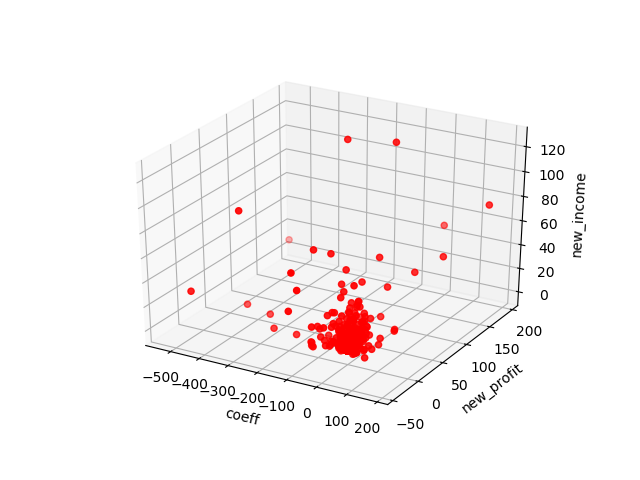

In [106]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#x = np.log2(df["income"])
#z = np.log2(df["profit"])
x = df["coeff"]
y = df["new_profit"]
z = df["new_income"]
ax.scatter(x, y, z, c='r', marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

### Runing the k-mean cluster

<IPython.core.display.Javascript object>


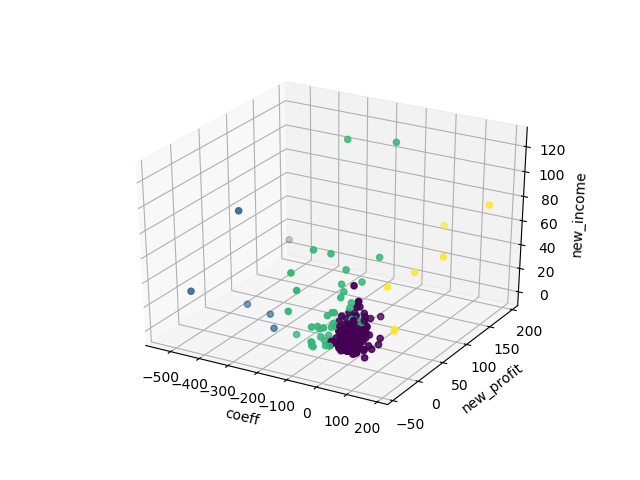

In [107]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(df)
labels = kmeans_model.predict(df)
k_means = labels
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df["coeff"]
y = df["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=labels, marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('new_profit')
ax.set_zlabel('new_income')

plt.show()

### Check the result accuracy.

In [108]:
X = df.values
print(metrics.silhouette_score(X, labels, metric='euclidean'))
print(davies_bouldin_score(X, labels))

0.9218178103110622
0.6416804154033725


C:\Users\yaoxinyu\Anaconda3\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


### Showing their common features.

In [109]:
df1 = pd.read_csv('new_data1.csv')
df1.shape
result = pd.concat([df1, pd.DataFrame(k_means)], axis=1, sort=False)
result.columns = ['company_id', 'daily_profit', "daily_income", "daily_outcome", "coeff", "p_value", "K_means"]

In [110]:
counter=collections.Counter(k_means)
print(counter)

Counter({0: 2834, 2: 43, 3: 7, 1: 6})


In [111]:
result.loc[(result['K_means'] == 0)].mean()

daily_profit       121.566188
daily_income     23658.315136
daily_outcome    23536.748947
coeff              -82.768148
p_value              0.262375
K_means              0.000000
dtype: float64

In [112]:
result.loc[(result['K_means'] == 2)].mean()

daily_profit       597.140205
daily_income     33159.791749
daily_outcome    32562.651543
coeff             -201.655887
p_value              0.257893
K_means              2.000000
dtype: float64

In [113]:
result.loc[(result['K_means'] == 3)].mean()

daily_profit       134.396132
daily_income     15944.357653
daily_outcome    15809.961521
coeff                4.084092
p_value              0.197634
K_means              3.000000
dtype: float64

In [114]:
result.loc[(result['K_means'] == 1)].mean()

daily_profit       45.760679
daily_income     4933.412421
daily_outcome    4887.651742
coeff              -5.061894
p_value             0.423531
K_means             1.000000
dtype: float64

## The clustering result for each company+account_name at each Label (Include the COVID-19 effect)

In [115]:
df = pd.read_csv('sub_new_data1.csv')

In [116]:
df.head()

user_name  daily_profit  \
0         00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales     82.057523   
1  009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales     18.768728   
2    009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales     19.840337   
3  009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income     55.199238   
4  009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...      3.429364   

   daily_income      expenses      coeff   p_value Labels  
0    6220.60697   6138.549447  -0.731327  0.851442      M  
1   16376.42800  16357.659272 -19.845017  0.047304      G  
2   17489.60720  17469.766863 -24.935850  0.084332      G  
3    4383.18000   4327.980762   3.283642  0.338881      G  
4    3198.61200   3195.182636  -3.546503  0.172920      G

In [117]:
df.shape

(3148, 7)

In [118]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

The expenses is highly correlated with the daily income, we can drop one of those.

In [119]:
df = df.drop(["expenses"], axis=1)

In [120]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [121]:
df = df.drop(["user_name", "p_value"], axis =1)

We can rename them.

In [122]:
df.head()

daily_profit  daily_income      coeff Labels
0     82.057523    6220.60697  -0.731327      M
1     18.768728   16376.42800 -19.845017      G
2     19.840337   17489.60720 -24.935850      G
3     55.199238    4383.18000   3.283642      G
4      3.429364    3198.61200  -3.546503      G

### Remove any outliers

In [123]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

In [124]:
labels = df['Labels'].unique().tolist()

Getting labels

### Getting tables for each label

In [125]:
alphab = []
daily_profit = []
daily_revenue = []
coeff = []
for label in labels:
    alphab.append(label)
    daily_profit.append(df.loc[(df['Labels'] == label)].mean()[0])
    daily_revenue.append(df.loc[(df['Labels'] == label)].mean()[1])
    coeff.append(df.loc[(df['Labels'] == label)].mean()[2])
    print("The label is", label)
    print(df.loc[(df['Labels'] == label)].mean())

The label is M
daily_profit      164.424153
daily_income    26410.587819
coeff             -63.040522
dtype: float64
The label is G
daily_profit      146.941637
daily_income    22480.887583
coeff             -77.889973
dtype: float64
The label is Q
daily_profit      150.978158
daily_income    17719.031260
coeff             -28.663210
dtype: float64
The label is I
daily_profit      110.164846
daily_income    26976.983416
coeff             -15.123609
dtype: float64
The label is A
daily_profit      153.645014
daily_income    33510.198488
coeff            -104.248974
dtype: float64
The label is H
daily_profit       70.343574
daily_income    13763.508271
coeff             -90.607428
dtype: float64
The label is L
daily_profit      141.820471
daily_income    28831.205296
coeff             -73.538772
dtype: float64
The label is C
daily_profit       -0.529215
daily_income    20454.581328
coeff             -47.015132
dtype: float64
The label is R
daily_profit      231.815850
daily_income    2757

### Base on the tabel draw the histogram graph.

### Daily proflit

<IPython.core.display.Javascript object>


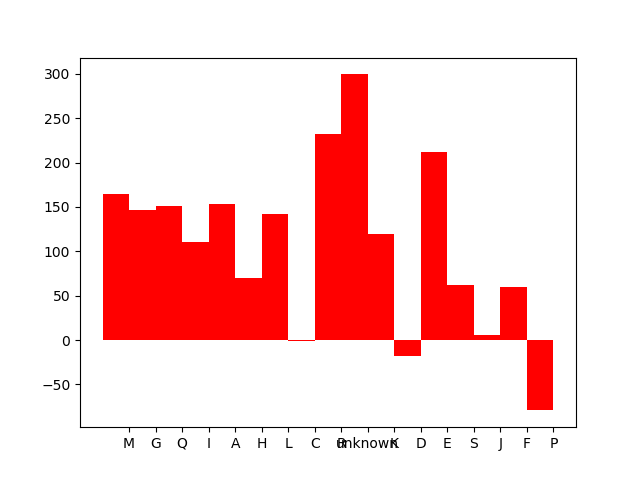

In [126]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_profit, width, color='r')
plt.show()

### Daily revenue

<IPython.core.display.Javascript object>


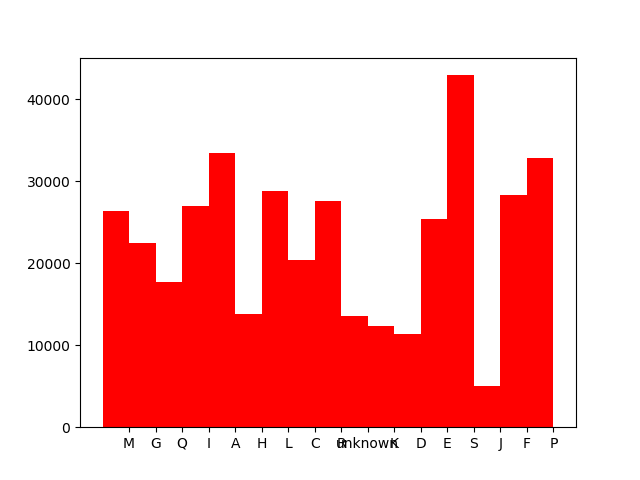

In [127]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_revenue, width, color='r')
plt.show()

### coefficient

<IPython.core.display.Javascript object>


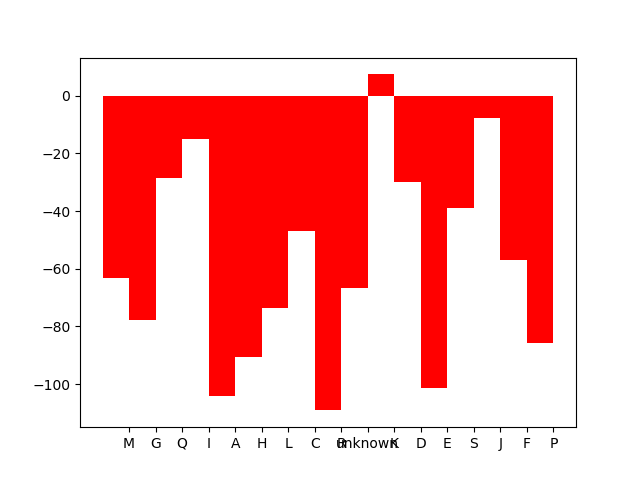

In [128]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, coeff, width, color='r')
plt.show()

### Net proflit rate

<IPython.core.display.Javascript object>


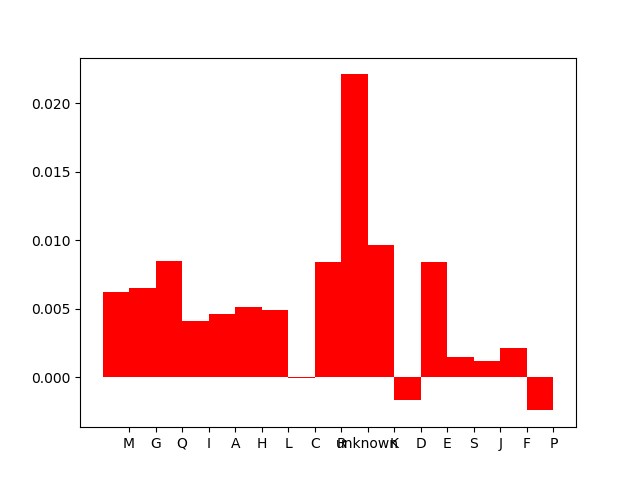

In [129]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, np.array(daily_profit)/np.array(daily_revenue), width, color='r')
plt.show()

### Plot based on label

<IPython.core.display.Javascript object>


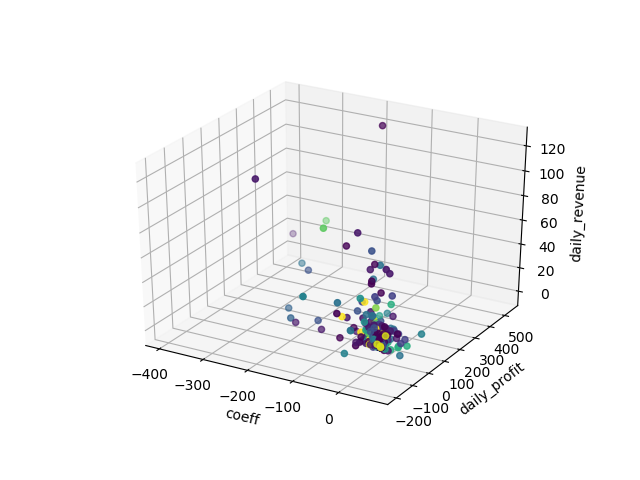

In [130]:
%matplotlib notebook
df1 = df.drop(["Labels"], axis=1)
sd = StandardScaler()
sd1 = RobustScaler()
df1 = sd.fit_transform(df1)
df1 = sd1.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1.columns = ['new_profit','new_income', 'coeff']
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df1["coeff"]
y = df1["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df1["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=pd.factorize( df['Labels'].to_numpy() )[0], marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('daily_profit')
ax.set_zlabel('daily_revenue')

plt.show()

### K-means cluster result for number for companie+account_names at each label.(number of cluster = 3)

The label is M


<IPython.core.display.Javascript object>


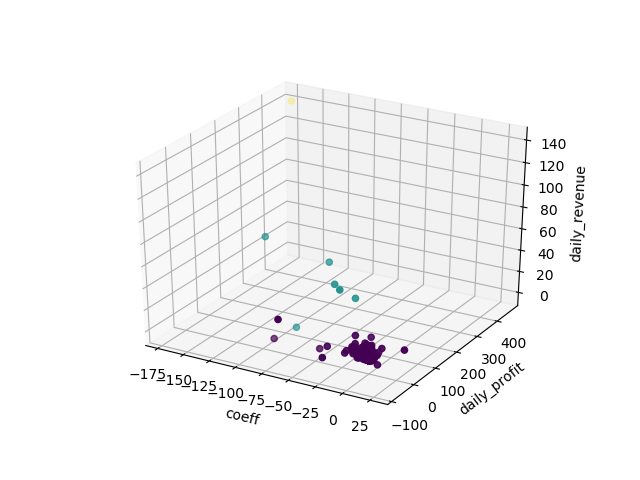

Counter({0: 502, 1: 6, 2: 1})
new_profit    0.869182
new_income    0.988635
coeff        -1.359339
0             0.000000
dtype: float64
new_profit    83.693569
new_income    44.555262
coeff        -63.403560
0              1.000000
dtype: float64
new_profit    465.267511
new_income    140.840415
coeff        -172.307898
0               2.000000
dtype: float64
The label is G


<IPython.core.display.Javascript object>


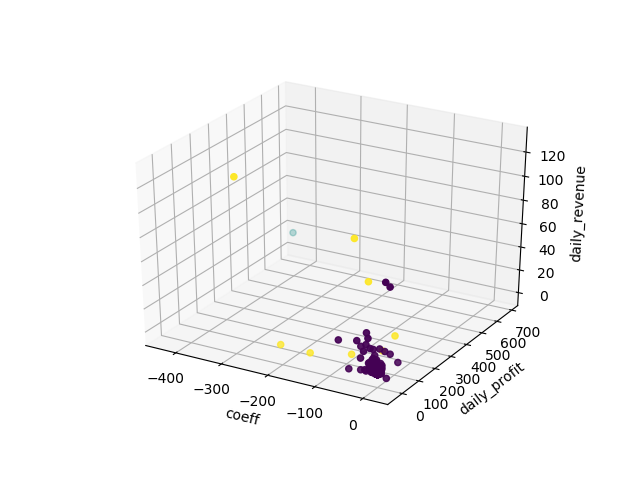

Counter({0: 749, 2: 8, 1: 1})
new_profit    1.479839
new_income    1.213271
coeff        -1.432215
0             0.000000
dtype: float64
new_profit    688.203356
new_income     16.372867
coeff        -433.999757
0               1.000000
dtype: float64
new_profit     85.167769
new_income     38.214300
coeff        -120.351063
0               2.000000
dtype: float64
The label is Q


<IPython.core.display.Javascript object>


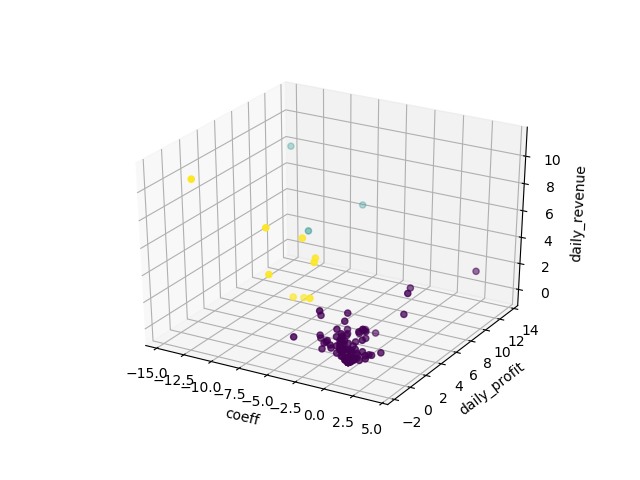

Counter({0: 139, 2: 9, 1: 3})
new_profit    0.541318
new_income    0.198156
coeff        -0.170750
0             0.000000
dtype: float64
new_profit    11.432144
new_income     5.673735
coeff        -10.528449
0              1.000000
dtype: float64
new_profit    0.525292
new_income    5.766442
coeff        -5.748857
0             2.000000
dtype: float64
The label is I


<IPython.core.display.Javascript object>


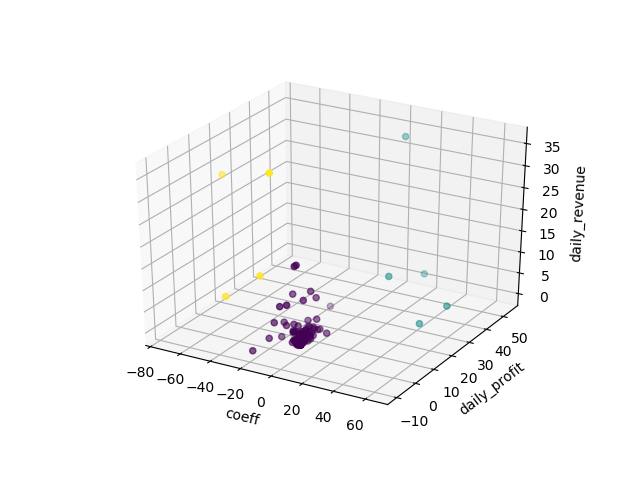

Counter({0: 210, 1: 5, 2: 4})
new_profit    0.897033
new_income    0.714568
coeff        -0.934724
0             0.000000
dtype: float64
new_profit    31.648419
new_income    12.389013
coeff         37.146337
0              1.000000
dtype: float64
new_profit     1.862484
new_income    22.685646
coeff        -37.705904
0              2.000000
dtype: float64
The label is A


<IPython.core.display.Javascript object>


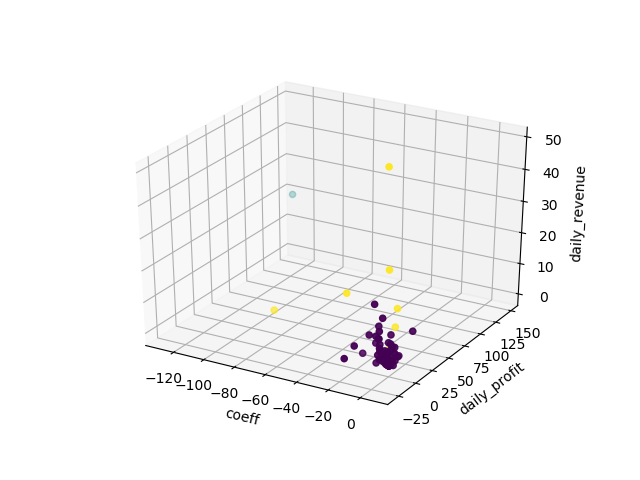

Counter({0: 232, 2: 7, 1: 1})
new_profit    0.585911
new_income    0.914872
coeff        -0.949983
0             0.000000
dtype: float64
new_profit    148.479909
new_income     19.291301
coeff        -128.743901
0               1.000000
dtype: float64
new_profit    29.119974
new_income    16.399333
coeff        -25.528363
0              2.000000
dtype: float64
The label is H


<IPython.core.display.Javascript object>


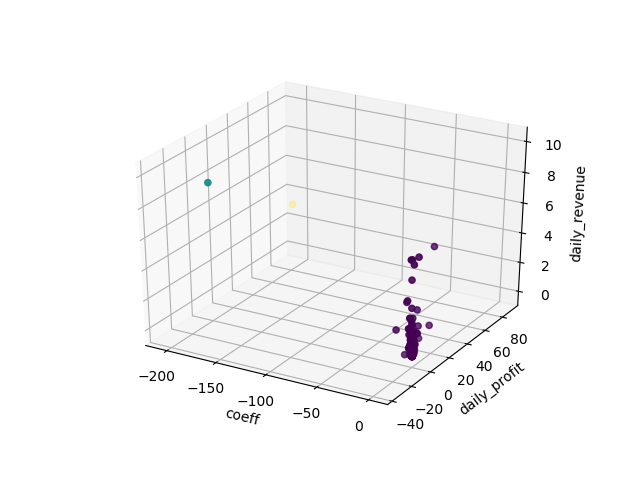

Counter({0: 159, 1: 1, 2: 1})
new_profit    0.805052
new_income    0.515980
coeff        -0.740691
0             0.000000
dtype: float64
new_profit    -35.356719
new_income     10.153687
coeff        -161.519256
0               1.000000
dtype: float64
new_profit     88.813823
new_income      3.174465
coeff        -206.606381
0               2.000000
dtype: float64
The label is L


<IPython.core.display.Javascript object>


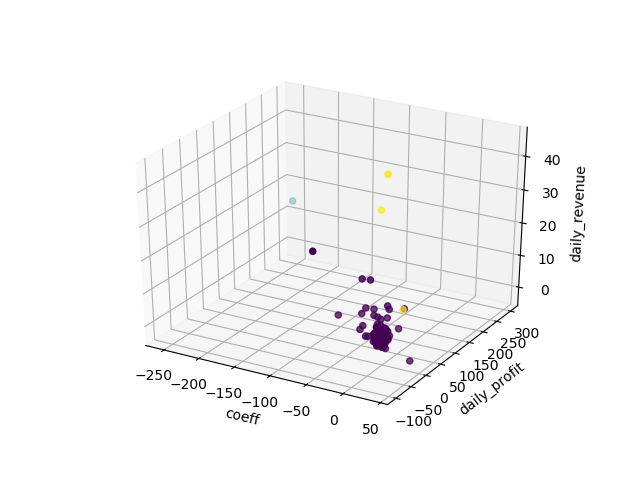

Counter({0: 323, 2: 3, 1: 1})
new_profit    0.639077
new_income    1.061702
coeff        -1.461697
0             0.000000
dtype: float64
new_profit    298.685948
new_income     14.260799
coeff        -255.035714
0               1.000000
dtype: float64
new_profit    96.824240
new_income    26.744186
coeff        -29.963804
0              2.000000
dtype: float64
The label is C


<IPython.core.display.Javascript object>


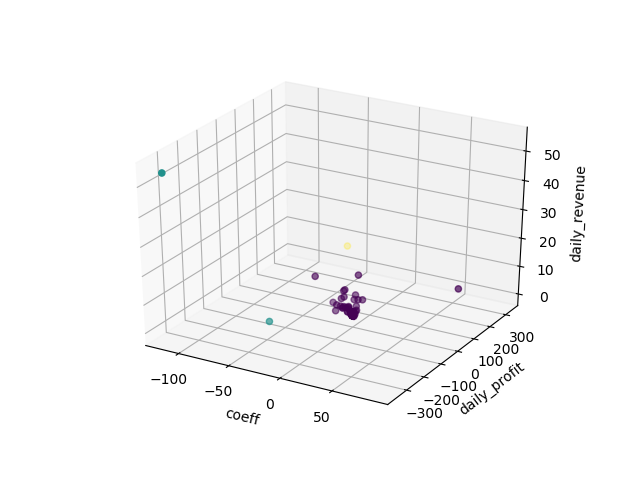

Counter({0: 150, 1: 2, 2: 1})
new_profit    1.549562
new_income    0.903861
coeff        -0.788276
0             0.000000
dtype: float64
new_profit   -284.382383
new_income     28.634440
coeff         -81.717149
0               1.000000
dtype: float64
new_profit    327.925255
new_income      6.618779
coeff         -61.705057
0               2.000000
dtype: float64
The label is R


<IPython.core.display.Javascript object>


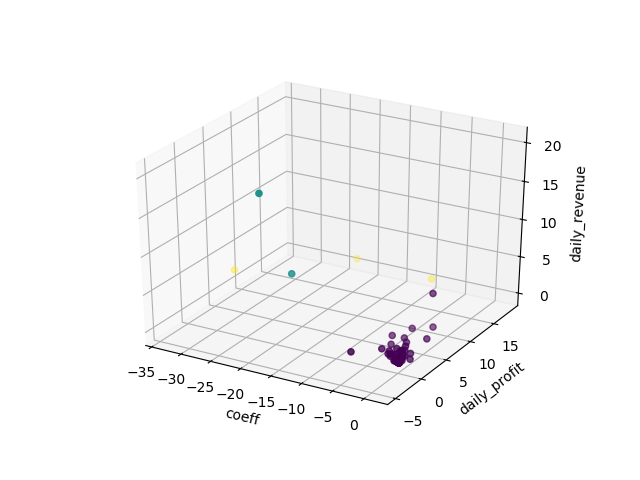

Counter({0: 65, 2: 3, 1: 2})
new_profit    0.741510
new_income    0.297111
coeff        -0.374299
0             0.000000
dtype: float64
new_profit    -3.825305
new_income    15.245726
coeff        -16.264290
0              1.000000
dtype: float64
new_profit    14.395530
new_income     1.485989
coeff        -21.469968
0              2.000000
dtype: float64
The label is unknown


<IPython.core.display.Javascript object>


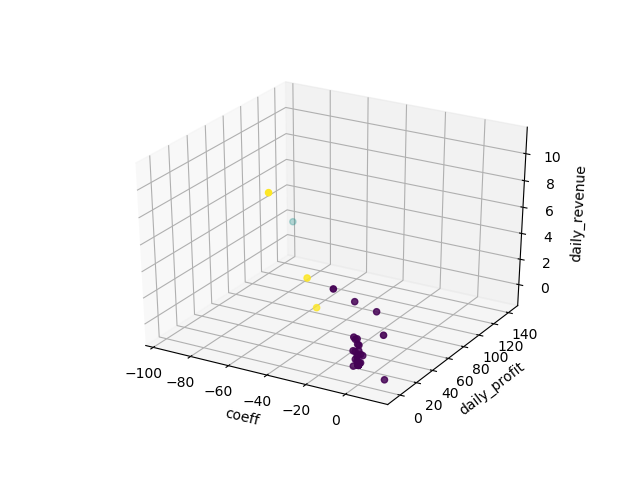

Counter({0: 55, 2: 3, 1: 1})
new_profit    1.067557
new_income    0.417502
coeff        -0.198703
0             0.000000
dtype: float64
new_profit    142.189270
new_income      1.714102
coeff         -96.096155
0               1.000000
dtype: float64
new_profit     9.199629
new_income     6.126311
coeff        -34.206790
0              2.000000
dtype: float64
The label is K


<IPython.core.display.Javascript object>


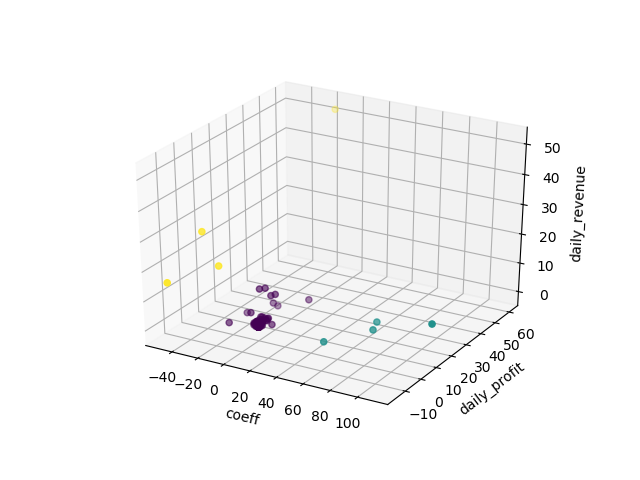

Counter({0: 136, 2: 4, 1: 4})
new_profit    0.890860
new_income    0.610849
coeff        -0.408384
0             0.000000
dtype: float64
new_profit    12.065876
new_income     2.270594
coeff         74.727059
0              1.000000
dtype: float64
new_profit    11.893145
new_income    27.991260
coeff        -34.730172
0              2.000000
dtype: float64
The label is D
Too less sample for clustering
The label is E


<IPython.core.display.Javascript object>


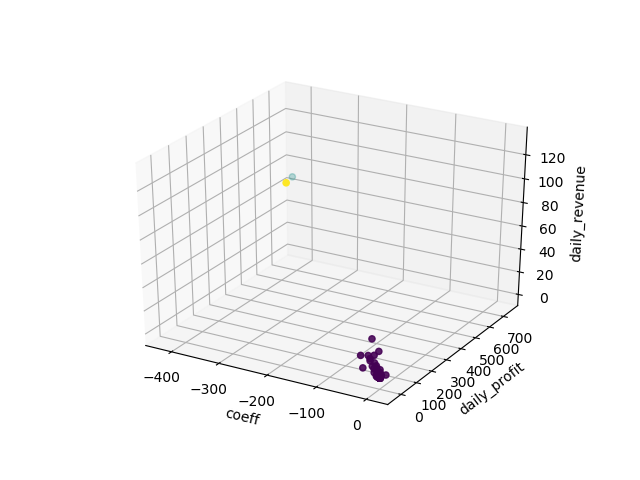

Counter({0: 161, 1: 1, 2: 1})
new_profit    0.893894
new_income    1.358368
coeff        -1.867677
0             0.000000
dtype: float64
new_profit    748.133963
new_income     67.792655
coeff        -423.439366
0               1.000000
dtype: float64
new_profit     89.834835
new_income    132.851010
coeff        -214.465401
0               2.000000
dtype: float64
The label is S


<IPython.core.display.Javascript object>


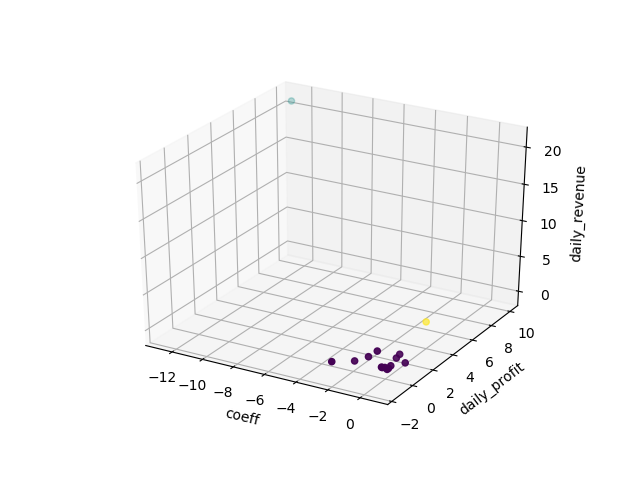

Counter({0: 13, 2: 1, 1: 1})
new_profit    0.027064
new_income    0.047131
coeff        -0.319940
0             0.000000
dtype: float64
new_profit    10.006179
new_income    21.064236
coeff        -12.768535
0              1.000000
dtype: float64
new_profit    4.099970
new_income    1.550810
coeff        -0.101392
0             2.000000
dtype: float64
The label is J


<IPython.core.display.Javascript object>


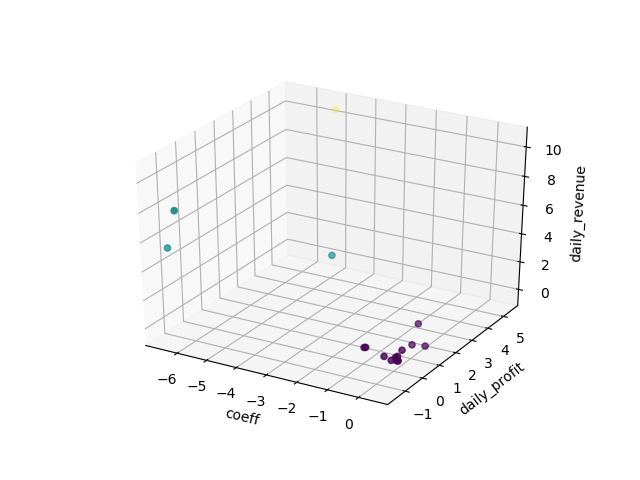

Counter({0: 13, 1: 3, 2: 1})
new_profit    0.216541
new_income   -0.018252
coeff        -0.053696
0             0.000000
dtype: float64
new_profit   -0.581694
new_income    6.086500
coeff        -5.159521
0             1.000000
dtype: float64
new_profit     5.428779
new_income    10.528328
coeff         -5.051006
0              2.000000
dtype: float64
The label is F


<IPython.core.display.Javascript object>


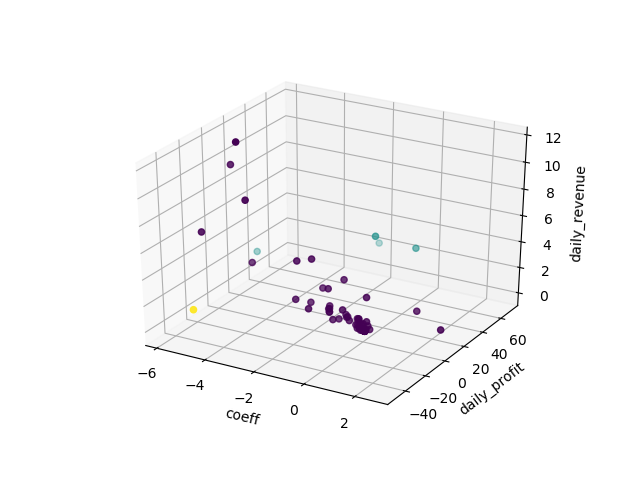

Counter({0: 86, 1: 4, 2: 1})
new_profit    0.364725
new_income    0.816055
coeff        -0.576565
0             0.000000
dtype: float64
new_profit    45.971903
new_income     3.224508
coeff         -2.137022
0              1.000000
dtype: float64
new_profit   -48.658008
new_income     2.022251
coeff         -4.800316
0              2.000000
dtype: float64
The label is P


<IPython.core.display.Javascript object>


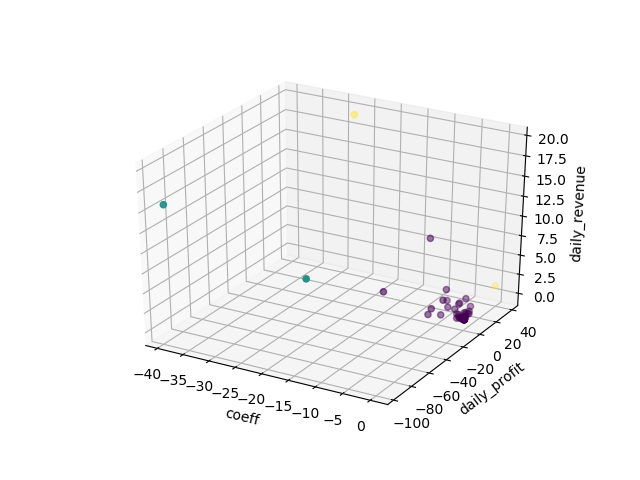

Counter({0: 61, 1: 2, 2: 2})
new_profit   -0.648155
new_income    0.511175
coeff        -0.763008
0             0.000000
dtype: float64
new_profit   -92.114677
new_income    12.676862
coeff        -27.104135
0              1.000000
dtype: float64
new_profit    36.281036
new_income    10.416593
coeff        -13.356825
0              2.000000
dtype: float64


In [131]:
%matplotlib notebook
for element in labels:
    print("The label is", element)
    part = df[df['Labels']==element].drop(["Labels"], axis=1)
    if (part.shape[0] < 10):
        print("Too less sample for clustering")
    #print(part.head())
    else:
        sd = StandardScaler()
        sd1 = RobustScaler()
        part = sd.fit_transform(part)
        part = sd1.fit_transform(part)
        part = pd.DataFrame(part)
        part.columns = ['new_profit','new_income', 'coeff']
        kmeans_model = KMeans(n_clusters=3, random_state=1).fit(part)
        labels = kmeans_model.predict(part)
        k_means = labels
        fig = plt.figure()
        ax = fig.gca(projection='3d')               # to work in 3d


        x = part["coeff"]
        y = part["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
        z = part["new_income"] # mean of the daily income / total number of days
        ax.scatter(x, y, z, c=labels, marker='o')

        ax.set_xlabel('coeff')
        ax.set_ylabel('daily_profit')
        ax.set_zlabel('daily_revenue')
        counter=collections.Counter(k_means)
        print(counter)
        part = pd.concat([part, pd.DataFrame(k_means)], axis=1, sort=False)
        print(part.loc[(part[0] == 0)].mean())
        print(part.loc[(part[0] == 1)].mean())
        print(part.loc[(part[0] == 2)].mean())
        plt.show()

## The clustering result for each company+account_name at each Label before 2020 (Not Include the COVID-19 effect)

In [132]:
df = pd.read_csv('sub_new_data2.csv')
df.head()

user_name  daily_profit  \
0         00415952-3309-4e6b-af4b-b1c02dc2d08b+Sales     82.057523   
1  009f7f82-f9be-470a-8df0-1e2043829cd5+Coffee Sales      9.651116   
2    009f7f82-f9be-470a-8df0-1e2043829cd5+Food Sales      7.909785   
3  009f7f82-f9be-470a-8df0-1e2043829cd5+Other Income     52.159368   
4  009f7f82-f9be-470a-8df0-1e2043829cd5+Soft Beve...      0.963863   

   daily_income      expenses      coeff   p_value Labels  
0   6220.606970   6138.549447  -0.731327  0.851442      M  
1  16712.679583  16703.028467 -20.082338  0.069878      G  
2  17785.715417  17777.805631 -26.526618  0.098223      G  
3   4478.290000   4426.130632   4.053917  0.270635      G  
4   3245.362083   3244.398221  -3.725343  0.197756      G

In [133]:
df.shape

(2892, 7)

### Correlation check

In [134]:
rs = np.random.RandomState(0)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [135]:
df = df.drop(["expenses"], axis=1)

In [136]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

In [137]:
df = df.drop(["user_name", "p_value"], axis =1)
df.head()

daily_profit  daily_income      coeff Labels
0     82.057523   6220.606970  -0.731327      M
1      9.651116  16712.679583 -20.082338      G
2      7.909785  17785.715417 -26.526618      G
3     52.159368   4478.290000   4.053917      G
4      0.963863   3245.362083  -3.725343      G

### Remove any outliers

In [138]:
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)
indexNames = df[ df['coeff'] == min(df['coeff']) ].index
df.drop(indexNames, inplace = True)

### Getting labels

In [139]:
labels = df['Labels'].unique().tolist()

### Showing the result table at each label.

In [140]:
alphab = []
daily_profit = []
daily_revenue = []
coeff = []
for label in labels:
    alphab.append(label)
    daily_profit.append(df.loc[(df['Labels'] == label)].mean()[0])
    daily_revenue.append(df.loc[(df['Labels'] == label)].mean()[1])
    coeff.append(df.loc[(df['Labels'] == label)].mean()[2])
    print("The label is", label)
    print(df.loc[(df['Labels'] == label)].mean())

The label is M
daily_profit      190.682993
daily_income    33747.444898
coeff             -54.310661
dtype: float64
The label is G
daily_profit      247.810063
daily_income    25941.812767
coeff             -70.900568
dtype: float64
The label is Q
daily_profit      327.382766
daily_income    22709.996949
coeff             -27.136665
dtype: float64
The label is I
daily_profit      361.828109
daily_income    29624.829429
coeff              -6.995932
dtype: float64
The label is A
daily_profit      564.716692
daily_income    49365.623428
coeff             -25.531566
dtype: float64
The label is H
daily_profit      173.736203
daily_income    21805.944529
coeff            -107.816313
dtype: float64
The label is L
daily_profit      489.386856
daily_income    40319.714714
coeff             -36.627059
dtype: float64
The label is C
daily_profit      264.689358
daily_income    25855.870941
coeff            -111.714774
dtype: float64
The label is R
daily_profit      660.243082
daily_income    4882

### Histogram plot for daily proflit

<IPython.core.display.Javascript object>


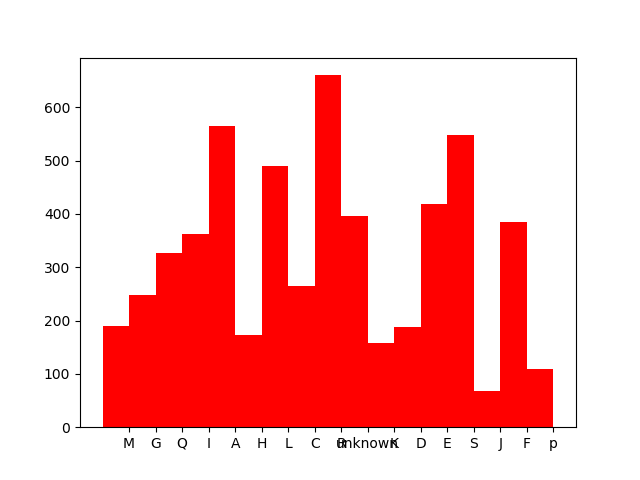

In [141]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_profit, width, color='r')
plt.show()

### Histogram plot for daily revenue

<IPython.core.display.Javascript object>


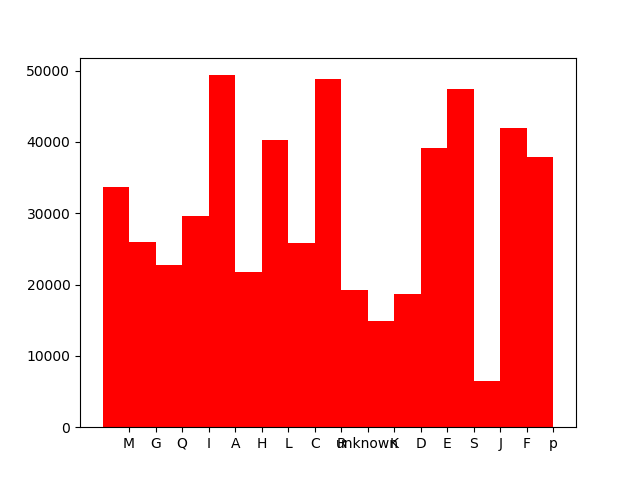

In [142]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, daily_revenue, width, color='r')
plt.show()

### Histogram plot for coefficient

<IPython.core.display.Javascript object>


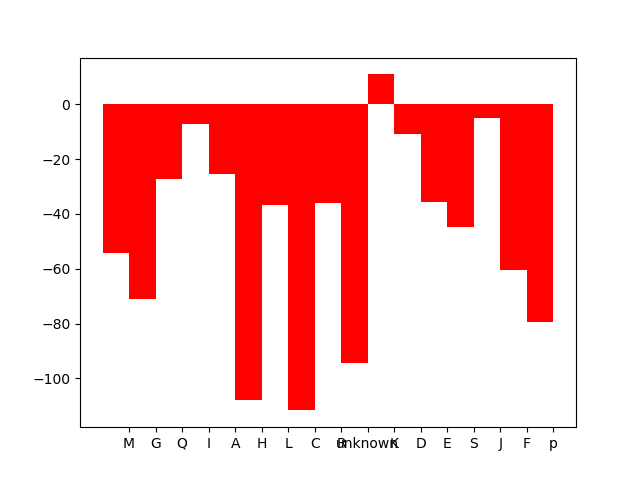

In [143]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, coeff, width, color='r')
plt.show()

### Histogram plot for net proflit rate

<IPython.core.display.Javascript object>


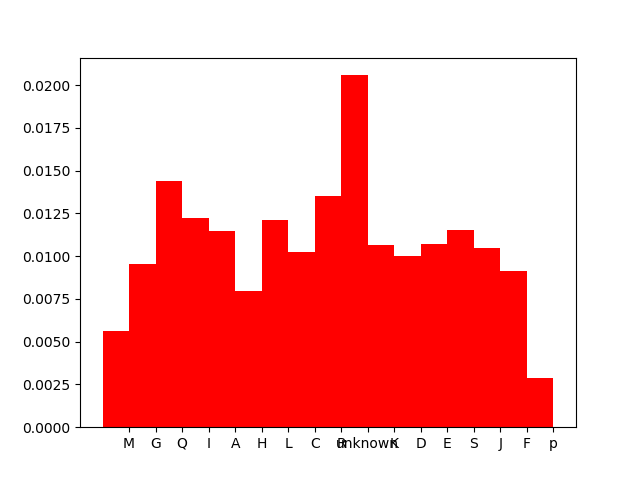

In [144]:
%matplotlib notebook
pos = np.arange(len(alphab))
width = 1.0     # gives histogram aspect to the bar diagram

ax = plt.axes()
ax.set_xticks(pos + (width / 2))
ax.set_xticklabels(alphab)

plt.bar(pos, np.array(daily_profit)/np.array(daily_revenue), width, color='r')
plt.show()

### The plot showing the company+account_name at each label.

<IPython.core.display.Javascript object>


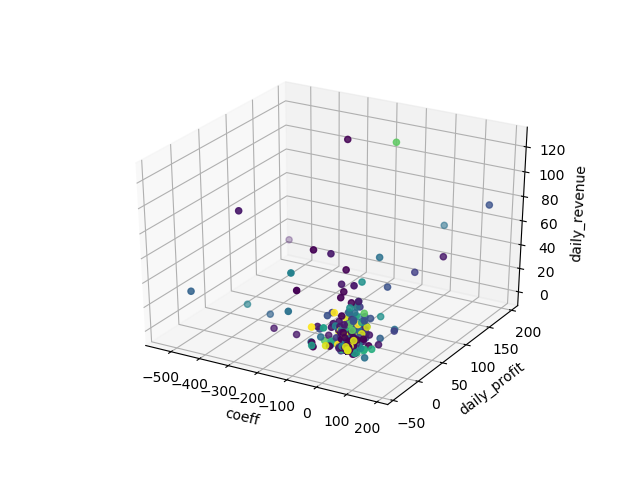

In [145]:
%matplotlib notebook
df1 = df.drop(["Labels"], axis=1)
sd = StandardScaler()
sd1 = RobustScaler()
df1 = sd.fit_transform(df1)
df1 = sd1.fit_transform(df1)
df1 = pd.DataFrame(df1)
df1.columns = ['new_profit','new_income', 'coeff']
fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d


x = df1["coeff"]
y = df1["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
z = df1["new_income"] # mean of the daily income / total number of days
ax.scatter(x, y, z, c=pd.factorize( df['Labels'].to_numpy() )[0], marker='o')

ax.set_xlabel('coeff')
ax.set_ylabel('daily_profit')
ax.set_zlabel('daily_revenue')

plt.show()

### The K-mean clustering result for each company+account_name at each label. 

The label is M


<IPython.core.display.Javascript object>


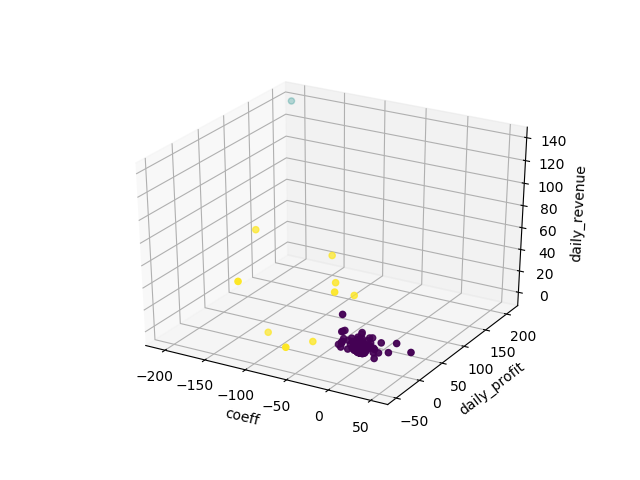

Counter({0: 474, 2: 9, 1: 1})
new_profit    1.144272
new_income    0.977458
coeff        -0.781411
0             0.000000
dtype: float64
new_profit    208.428902
new_income    138.783165
coeff        -205.686448
0               1.000000
dtype: float64
new_profit    15.473400
new_income    33.794171
coeff        -79.956718
0              2.000000
dtype: float64
The label is G


<IPython.core.display.Javascript object>


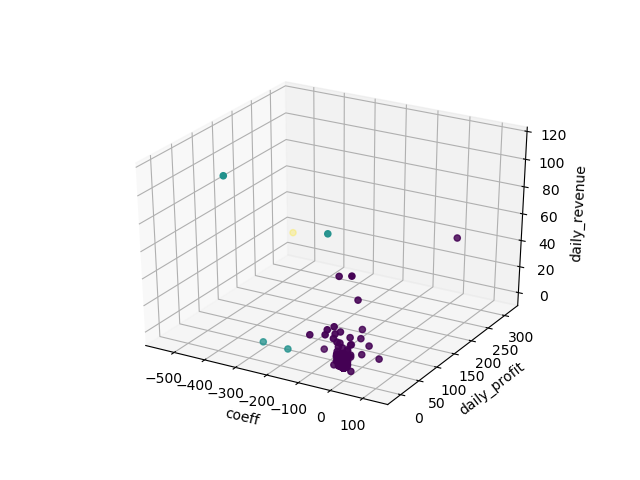

Counter({0: 721, 1: 4, 2: 1})
new_profit    1.895216
new_income    1.376373
coeff        -1.678792
0             0.000000
dtype: float64
new_profit     26.333510
new_income     49.086594
coeff        -243.174808
0               1.000000
dtype: float64
new_profit    316.624768
new_income     14.347741
coeff        -545.130802
0               2.000000
dtype: float64
The label is Q


<IPython.core.display.Javascript object>


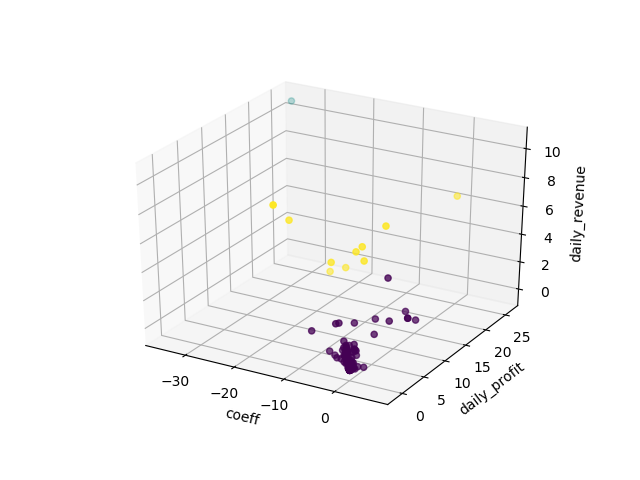

Counter({0: 125, 2: 10, 1: 1})
new_profit    0.523847
new_income    0.252931
coeff        -0.054694
0             0.000000
dtype: float64
new_profit    26.202598
new_income    10.653528
coeff        -35.165273
0              1.000000
dtype: float64
new_profit    7.042237
new_income    6.549286
coeff        -6.210616
0             2.000000
dtype: float64
The label is I


<IPython.core.display.Javascript object>


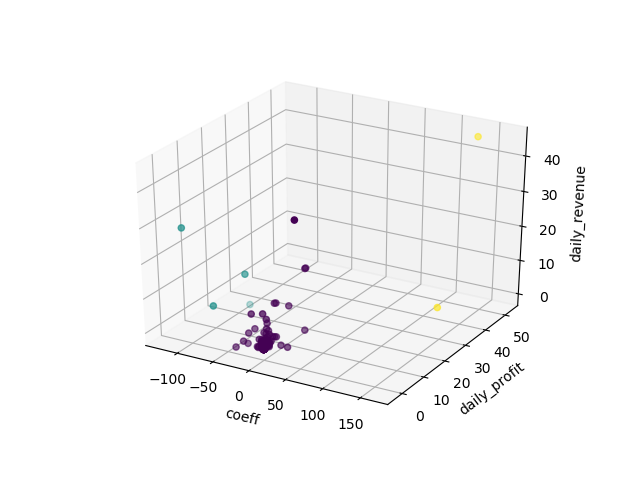

Counter({0: 199, 1: 4, 2: 2})
new_profit    0.708135
new_income    0.933788
coeff        -0.680823
0             0.000000
dtype: float64
new_profit     4.868682
new_income    14.680051
coeff        -71.162637
0              1.000000
dtype: float64
new_profit     37.895874
new_income     27.114571
coeff         148.641890
0               2.000000
dtype: float64
The label is A


<IPython.core.display.Javascript object>


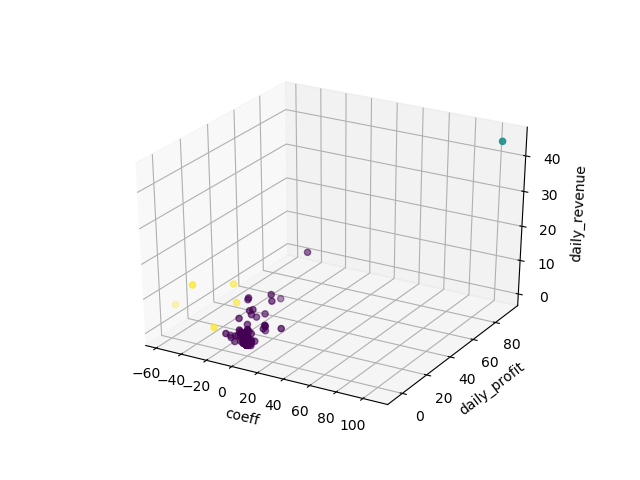

Counter({0: 200, 2: 5, 1: 1})
new_profit    1.183763
new_income    0.927878
coeff        -0.500203
0             0.000000
dtype: float64
new_profit     93.327637
new_income     44.654420
coeff         106.441626
0               1.000000
dtype: float64
new_profit     3.933403
new_income     8.898024
coeff        -32.083774
0              2.000000
dtype: float64
The label is H


<IPython.core.display.Javascript object>


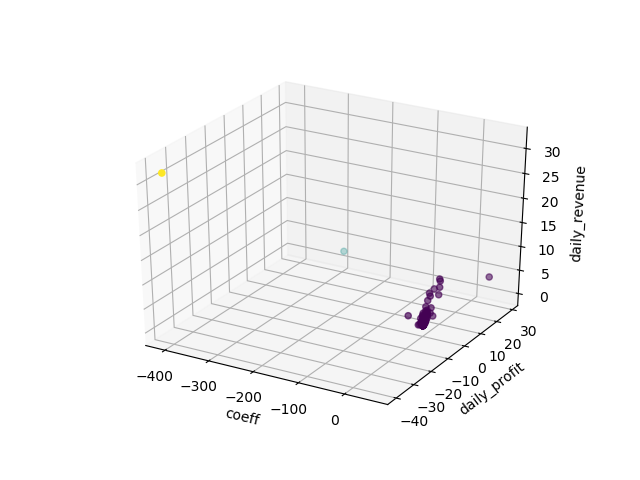

Counter({0: 143, 2: 1, 1: 1})
new_profit    0.966088
new_income    0.580807
coeff        -0.309245
0             0.000000
dtype: float64
new_profit     28.507534
new_income      2.507115
coeff        -289.654292
0               1.000000
dtype: float64
new_profit    -39.775207
new_income     31.861088
coeff        -410.263193
0               2.000000
dtype: float64
The label is L


<IPython.core.display.Javascript object>


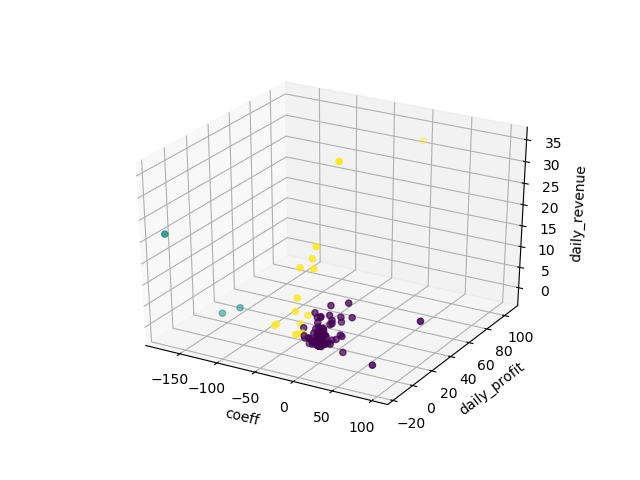

Counter({0: 260, 2: 15, 1: 3})
new_profit    0.914476
new_income    0.570239
coeff         0.755004
0             0.000000
dtype: float64
new_profit     -9.359547
new_income     10.206964
coeff        -129.934080
0               1.000000
dtype: float64
new_profit    13.967725
new_income    11.147251
coeff        -29.408352
0              2.000000
dtype: float64
The label is C


<IPython.core.display.Javascript object>


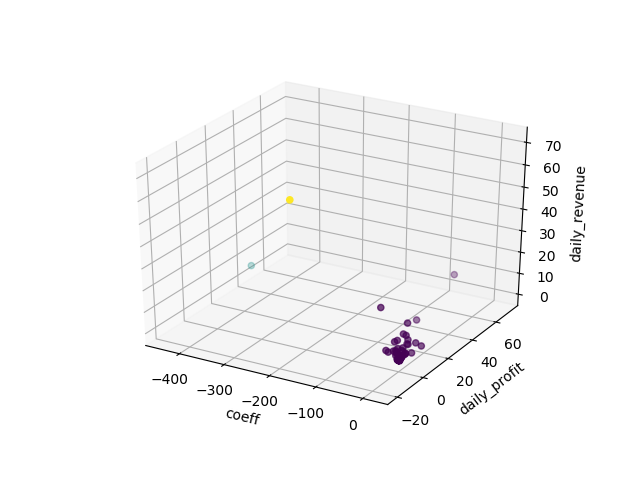

Counter({0: 140, 2: 1, 1: 1})
new_profit    1.665997
new_income    1.066943
coeff        -2.146061
0             0.000000
dtype: float64
new_profit     39.595662
new_income      6.427207
coeff        -442.929783
0               1.000000
dtype: float64
new_profit    -20.537017
new_income     71.449937
coeff        -171.274414
0               2.000000
dtype: float64
The label is R


<IPython.core.display.Javascript object>


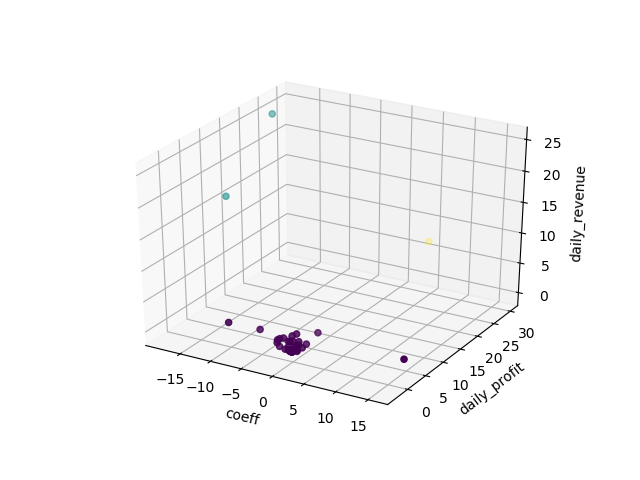

Counter({0: 42, 1: 2, 2: 1})
new_profit    0.215305
new_income    0.280785
coeff        -0.222695
0             0.000000
dtype: float64
new_profit    18.120855
new_income    20.460831
coeff        -18.001908
0              1.000000
dtype: float64
new_profit    29.927990
new_income     6.567093
coeff          4.526648
0              2.000000
dtype: float64
The label is unknown


<IPython.core.display.Javascript object>


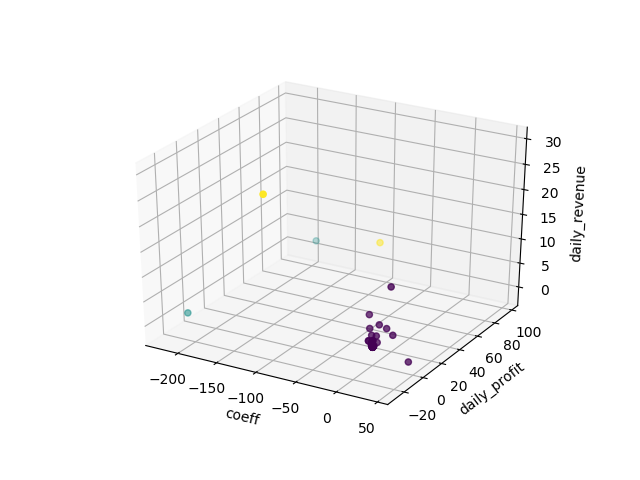

Counter({0: 51, 1: 2, 2: 2})
new_profit    1.160078
new_income    0.619518
coeff         0.694285
0             0.000000
dtype: float64
new_profit     43.915914
new_income      0.930440
coeff        -207.021815
0               1.000000
dtype: float64
new_profit    22.350714
new_income    19.357904
coeff        -87.662146
0              2.000000
dtype: float64
The label is K


<IPython.core.display.Javascript object>


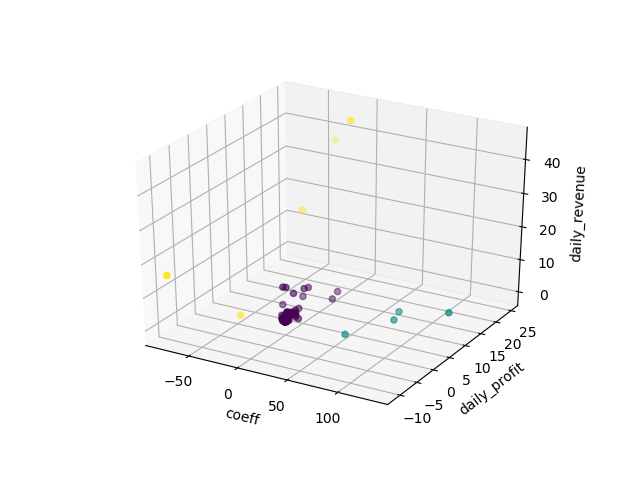

Counter({0: 133, 2: 5, 1: 4})
new_profit    0.609178
new_income    0.580498
coeff        -0.005930
0             0.000000
dtype: float64
new_profit     6.684358
new_income     1.909018
coeff         90.065986
0              1.000000
dtype: float64
new_profit     9.105107
new_income    24.679088
coeff        -36.917728
0              2.000000
dtype: float64
The label is D
Too less sample for clustering
The label is E


<IPython.core.display.Javascript object>


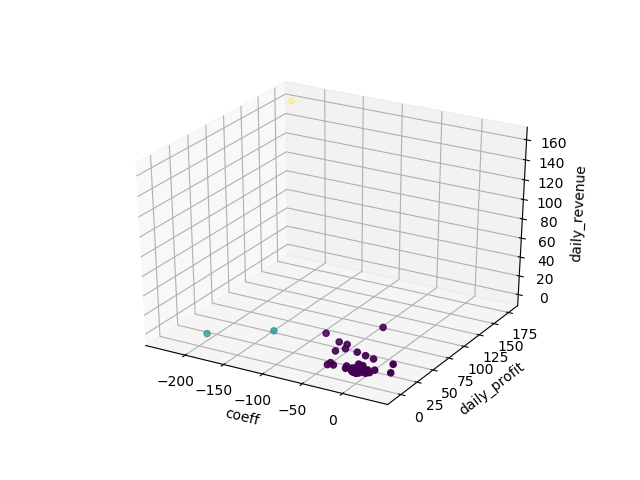

Counter({0: 142, 1: 2, 2: 1})
new_profit    1.724557
new_income    1.374342
coeff        -1.310617
0             0.000000
dtype: float64
new_profit      4.617834
new_income     10.113801
coeff        -149.607214
0               1.000000
dtype: float64
new_profit    177.534771
new_income    160.714957
coeff        -232.399750
0               2.000000
dtype: float64
The label is S


<IPython.core.display.Javascript object>


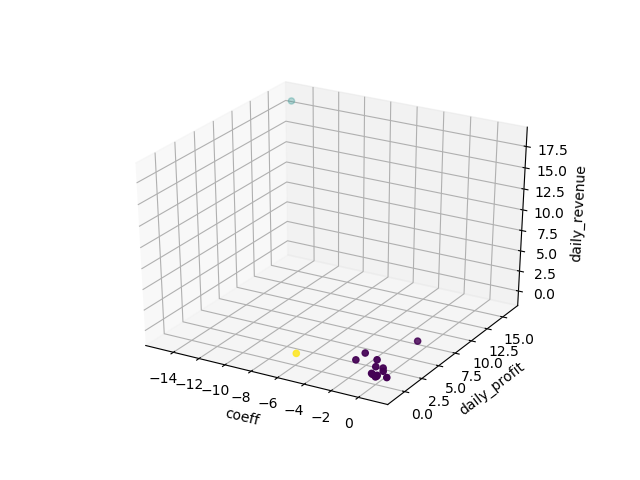

Counter({0: 13, 2: 1, 1: 1})
new_profit    0.304407
new_income    0.102006
coeff         0.035153
0             0.000000
dtype: float64
new_profit    16.178690
new_income    18.355549
coeff        -15.015084
0              1.000000
dtype: float64
new_profit   -1.159397
new_income    0.622070
coeff        -5.265046
0             2.000000
dtype: float64
The label is J


<IPython.core.display.Javascript object>


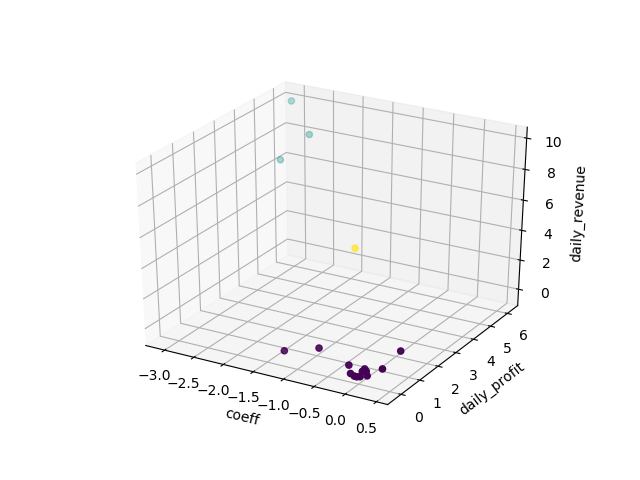

Counter({0: 13, 1: 3, 2: 1})
new_profit   -0.016441
new_income   -0.041536
coeff        -0.053871
0             0.000000
dtype: float64
new_profit    5.521041
new_income    8.556909
coeff        -2.828051
0             1.000000
dtype: float64
new_profit    2.728603
new_income    4.609590
coeff        -0.914435
0             2.000000
dtype: float64
The label is F


<IPython.core.display.Javascript object>


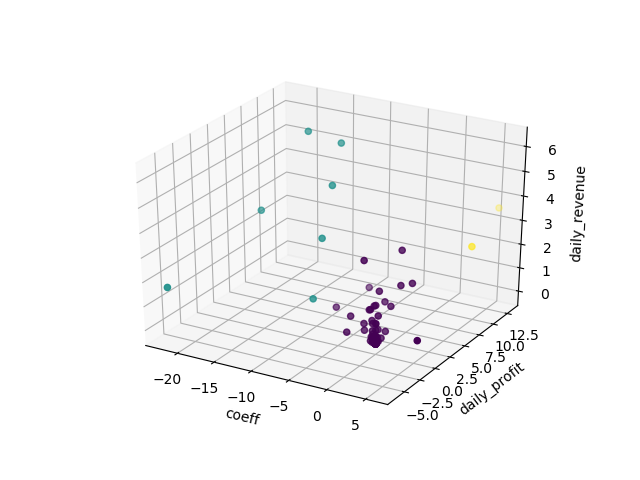

Counter({0: 75, 1: 7, 2: 2})
new_profit    0.486708
new_income    0.247290
coeff        -0.408532
0             0.000000
dtype: float64
new_profit     2.658460
new_income     3.838564
coeff        -13.307645
0              1.000000
dtype: float64
new_profit    10.692265
new_income     3.193431
coeff          5.736565
0              2.000000
dtype: float64
The label is p


<IPython.core.display.Javascript object>


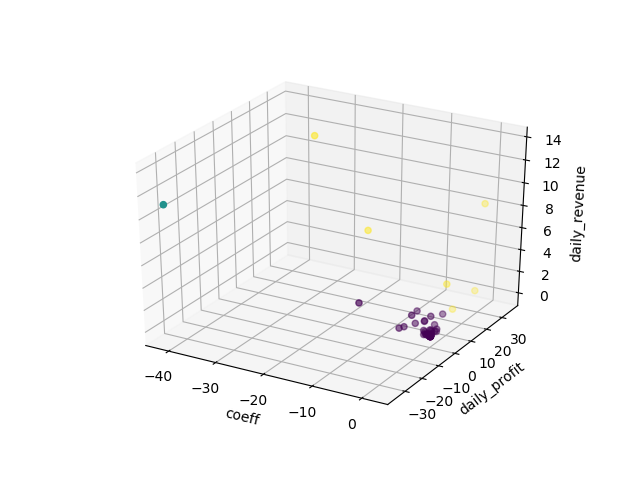

Counter({0: 54, 2: 6, 1: 1})
new_profit   -0.075922
new_income    0.218441
coeff        -0.637777
0             0.000000
dtype: float64
new_profit   -34.887978
new_income    11.116277
coeff        -41.752329
0              1.000000
dtype: float64
new_profit    17.111916
new_income     5.825757
coeff         -7.304823
0              2.000000
dtype: float64


In [147]:
%matplotlib notebook
for element in labels:
    print("The label is", element)
    part = df[df['Labels']==element].drop(["Labels"], axis=1)
    if (part.shape[0] < 10):
        print("Too less sample for clustering")
    #print(part.head())
    else:
        sd = StandardScaler()
        sd1 = RobustScaler()
        part = sd.fit_transform(part)
        part = sd1.fit_transform(part)
        part = pd.DataFrame(part)
        part.columns = ['new_profit','new_income', 'coeff']
        kmeans_model = KMeans(n_clusters=3, random_state=1).fit(part)
        labels = kmeans_model.predict(part)
        k_means = labels
        fig = plt.figure()
        ax = fig.gca(projection='3d')               # to work in 3d


        x = part["coeff"]
        y = part["new_profit"] # (closing balanced at account - starting balanced at account) / total number of days
        z = part["new_income"] # mean of the daily income / total number of days
        ax.scatter(x, y, z, c=labels, marker='o')

        ax.set_xlabel('coeff')
        ax.set_ylabel('daily_profit')
        ax.set_zlabel('daily_revenue')
        counter=collections.Counter(k_means)
        print(counter)
        part = pd.concat([part, pd.DataFrame(k_means)], axis=1, sort=False)
        print(part.loc[(part[0] == 0)].mean())
        print(part.loc[(part[0] == 1)].mean())
        print(part.loc[(part[0] == 2)].mean())
        plt.show()